In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np

dirname=os.path.dirname(os.path.abspath('__file__'))
filename=os.path.join(dirname,'./data/recipesData.json')
df=pd.read_json(filename)

In [3]:
df.keys()

Index(['_id', 'ratingData', 'name', 'datePublished', 'description',
       'recipeYield', 'recipeIngredient', 'recipeInstructions',
       'recipeCategory', 'nutrition', 'category', 'Tatcategory', 'RecId',
       'link', 'rating', 'img', 'prepTimeVal', 'cookTimeval', 'totalTimeVal',
       'ratingCount', 'bestRating', 'worstRating', 'video'],
      dtype='object')

In [4]:
df.head()

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.400000,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.461538,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.473684,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.333333,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.277778,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN


In [5]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.0,39040.0
mean,112895.666086,4.371487,17.218673,38.983145,116.662935,143.393161,5.0,1.0
std,95889.028504,0.364167,157.304697,80.251754,647.063189,475.474423,0.0,0.0
min,6663.000000,1.315789,0.000000,0.000000,0.000000,10.000000,5.0,1.0
25%,19107.500000,4.200000,10.000000,5.000000,24.000000,20.000000,5.0,1.0
50%,78021.500000,4.449015,15.000000,20.000000,45.000000,41.000000,5.0,1.0
75%,220546.750000,4.619048,20.000000,40.000000,85.000000,106.000000,5.0,1.0
max,282261.000000,5.000000,30240.000000,3000.000000,30310.000000,19033.000000,5.0,1.0


In [6]:
from scipy import stats
df = df.loc[(df['totalTimeVal'] >= 2) & (df['totalTimeVal'] <= 1000)]

In [7]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,34408.000000,34408.000000,34408.000000,34408.000000,34408.000000,34408.000000,34408.0,34408.0
mean,123903.710649,4.382584,17.841781,42.726546,91.143426,148.472913,5.0,1.0
std,94897.903061,0.359398,19.647556,75.494823,123.948642,497.433192,0.0,0.0
min,6664.000000,1.315789,0.000000,0.000000,2.000000,10.000000,5.0,1.0
25%,23733.750000,4.210526,10.000000,10.000000,30.000000,19.000000,5.0,1.0
50%,99463.500000,4.457447,15.000000,22.000000,50.000000,41.000000,5.0,1.0
75%,222928.250000,4.626892,20.000000,45.000000,90.000000,107.000000,5.0,1.0
max,282261.000000,5.000000,900.000000,840.000000,1000.000000,19033.000000,5.0,1.0


In [8]:
df['recipeCategory']

0        [Appetizers and Snack Recipes, Dips and Spread...
1        [Appetizers and Snack Recipes, Dips and Spread...
2                        [Side Dish, Vegetables, Eggplant]
3        [Appetizers and Snack Recipes, Dips and Spread...
4        [Appetizers and Snack Recipes, Dips and Spread...
                               ...                        
39035                [Main Dish Recipes, Meatball Recipes]
39036    [Main Dish Recipes, Meatloaf Recipes, Beef Mea...
39037                     [Main Dish Recipes, Rib Recipes]
39038     [World Cuisine Recipes, Latin American, Mexican]
39039    [Main Dish Recipes, Meatloaf Recipes, Beef Mea...
Name: recipeCategory, Length: 34408, dtype: object

In [9]:
df

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.400000,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.461538,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.473684,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.333333,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.277778,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39035,{'$oid': '5fc519d9d38145ece7ebfc34'},"[{'rating': 5, 'count': 314, 'percentage': 61}...",Waikiki Meatballs,2020-03-05T04:56:32.000Z,"Beef meatballs flavored with ground ginger, si...",6 servings,"[1 ½ pounds ground beef, ⅔ cup crushed saltine...","[{'text': 'In a large bowl, combine ground bee...","[Main Dish Recipes, Meatball Recipes]","{'calories': '441.9 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/25197/waikik...,4.443359,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,25,45,512,5,1,NaN
39036,{'$oid': '5fc519d9d38145ece7ebfc35'},"[{'rating': 5, 'count': 85, 'percentage': 40},...",Wonderful Meatloaf,2000-01-12T22:38:46.000Z,This is my all time favorite recipe for meatlo...,4 servings,"[1 pound ground beef, ¾ cup cooked rice, 1 tab...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Main Dish Recipes, Meatloaf Recipes, Beef Mea...","{'calories': '441.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/16353/wonder...,3.985782,https://imagesvc.meredithcorp.io/v

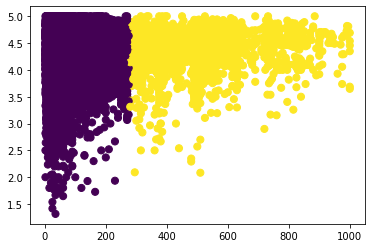

In [10]:
time_df=df[["rating","totalTimeVal"]]


kmeans = KMeans(n_clusters=2, random_state=0).fit(time_df)
y_kmeans = kmeans.predict(time_df)
# centers = kmeans.cluster_centers_
plt.scatter(time_df.iloc[:, 1], time_df.iloc[:,0], c=y_kmeans, s=50, cmap="viridis")
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#y_kmeans

In [11]:


df['instructionsCount'] = df['recipeInstructions'].apply(lambda x: len(x))
df['recipeCount'] = df['recipeIngredient'].apply(lambda x: len(x))

# create a new column for percentiles
df['pct_totalTimeVal'] = df['totalTimeVal'].rank(pct=True).apply(lambda x: float(x))
df['pct_recipeCount'] = df['recipeCount'].rank(pct=True).apply(lambda x: float(x))
df['pct_instructionsCount'] = df['instructionsCount'].rank(pct=True).apply(lambda x: float(x))
# create a new column for difficulty
df['difficulty'] = df['pct_instructionsCount'] * df['pct_recipeCount'] * df['pct_totalTimeVal']

In [79]:
pd.options.display.float_format = '{:20,.2f}'.format
df.round(4)
df['difficulty'].sort_values(ascending=True)
df['difficulty'].describe()

difficultyDict = {}
for index, row in df.iterrows(): 
    difficultyDict[row.RecId] = row.difficulty

In [20]:
filename=os.path.join(dirname,'./data/ratings.csv')
dfUsersRatings=pd.read_csv(filename)

In [81]:
filteredRatingsDf = dfUsersRatings[dfUsersRatings.recipeId.isin(df.RecId)]

KeyError: 'RecId'

In [92]:
filteredRatingsDf['difficulty'] = filteredRatingsDf['recipeId'].map(difficultyDict)


/var/folders/_m/zl1kl8b534jgc_mxmmmvzgbr0000gn/T/ipykernel_17713/3994629935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredRatingsDf['difficulty'] = filteredRatingsDf['recipeId'].map(difficultyDict)


In [93]:
filteredRatingsDf

,userId,rating,recipeId,difficulty
0,3,5,23945,0.05
1,6,4,23945,0.05
5,14,5,161178,0.00
6,15,5,161178,0.00
7,17,5,161178,0.00
...,...,...,...,...
1923452,153110,5,16293,0.27
1923453,99619,5,16293,0.27
1923454,7227,3,16293,0.27
1923455,362781,5,16293,0.27


In [95]:
filteredRatingsByUser = filteredRatingsDf.groupby('userId').agg({'rating':'mean', 'recipeId': 'count', 'difficulty': 'mean'})


In [96]:
filteredRatingsByUser

,rating,recipeId,difficulty
userId,,,
3,4.35,136,0.16
6,4.17,241,0.15
8,4.46,26,0.11
11,4.33,57,0.12
13,3.31,13,0.22
...,...,...,...
951524,4.11,9,0.18
955553,4.30,10,0.29
959605,3.90,10,0.15


In [106]:
filteredRatingsByUser.to_dict()['difficulty']


{3: 0.15755659377634235,
 6: 0.15438658374840378,
 8: 0.11161687727661589,
 11: 0.12000938492709369,
 13: 0.21586450137510632,
 14: 0.12664586911111889,
 15: 0.11162009572690197,
 17: 0.1616531871360717,
 18: 0.13799364185366955,
 20: 0.1392068163891491,
 21: 0.15329223344987936,
 23: 0.21094152963703436,
 25: 0.16553458704807847,
 26: 0.12943780637363395,
 28: 0.18993091725158864,
 29: 0.059210707605512225,
 31: 0.19412587960890929,
 33: 0.20743680805082704,
 36: 0.13539248674579216,
 37: 0.2435096311294719,
 38: 0.11588519525292473,
 39: 0.1844803410180294,
 40: 0.17145783565326117,
 41: 0.13072746836273186,
 42: 0.17046380330210822,
 44: 0.12333294075376783,
 45: 0.25415275862346537,
 46: 0.15110423913423138,
 47: 0.13350759831280887,
 48: 0.10040526454565397,
 49: 0.1440166474722821,
 50: 0.09574301107354746,
 52: 0.09077685892430609,
 53: 0.09427750388124184,
 55: 0.12993418143974406,
 56: 0.10270815994438387,
 58: 0.18441577765953035,
 60: 0.16770704273203382,
 62: 0.083845783249

section 3
 - filter user ratings the recipes are not in the current df - V
 - count recipes per user - V
 - calculate the difficulty of all the recipes he rated (sum of the recipes and devide by sum of the difficulty) - V
 - regression


section 5
- parse categories from json file - V
- group ingredients by category - V
- tf-idf ingredients for all recipies - V
- find the top 10 ingredients for each category - V


In [13]:
categoriesPath=os.path.join(dirname,'./data/topCategories.json')
dfCategories=pd.read_json(categoriesPath)
dfCategories=dfCategories['name']

In [14]:
dfCategories.head(10)

0                   Dessert Recipes
1                         Side Dish
2             World Cuisine Recipes
3      Appetizers and Snack Recipes
4                 Main Dish Recipes
5          Meat and Poultry Recipes
6    Soups, Stews and Chili Recipes
7                             Salad
8                        Vegetables
9     Sauces and Condiments Recipes
Name: name, dtype: object

In [15]:
dfCategoriesGroupBy = dict.fromkeys(dfCategories, [])
dfAllRecipies = []
for index, category in dfCategories.iteritems():
    for index2, recipe in df.iterrows():
        if(category in recipe['recipeCategory']):
            dfCategoriesGroupBy[category] = dfCategoriesGroupBy[category] + recipe['recipeIngredient']

In [16]:
for key in dfCategoriesGroupBy:
    dfCategoriesGroupBy[key] = ' '.join(dfCategoriesGroupBy[key])
    dfAllRecipies.append(dfCategoriesGroupBy[key])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
cv = CountVectorizer(analyzer= 'word', stop_words='english',max_features=20000, max_df=0.85)

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(dfAllRecipies)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

count_vector=cv.transform(dfAllRecipies) 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [18]:
feature_names = cv.get_feature_names_out()  
pd.set_option("display.max_rows", 150, "display.max_columns", None)

def get_top_10_tfidf(feature_names, categories, tfidf_vector, index):
    print('category: ' + categories[index])
    category_vector = tfidf_vector[index]
    df = pd.DataFrame(category_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
    df = df.loc[df['tfidf'] >= 0.07]
    print(df.sort_values(by=["tfidf"],ascending=True).tail(10))
    print('===================================\n')
for index in range(len(dfCategories)):
    get_top_10_tfidf(feature_names, dfCategories, tf_idf_vector, index)    


category: Dessert Recipes
                             tfidf
pecans                        0.11
pudding                       0.11
shortening                    0.11
crust                         0.11
cake                          0.14
cocoa                         0.14
semisweet                     0.16
confectioners                 0.24
chocolate                     0.41
extract                       0.73

category: Side Dish
                        tfidf
broth                    0.12
parsley                  0.12
parmesan                 0.12
bell                     0.12
onions                   0.13
tomatoes                 0.14
mustard                  0.14
chicken                  0.16
onion                    0.52
garlic                   0.61

category: World Cuisine Recipes
                        tfidf
tomato                   0.13
bell                     0.15
tomatoes                 0.15
breast                   0.16
skinless                 0.17
beef                     